
# Predict how long patient can stay in the hospital.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Cleaning and Rearranging data

In [2]:
df_train = pd.read_csv("dataset/train_data.csv",index_col=0)
df_test = pd.read_csv("dataset/test_data.csv",index_col=0)
print(df_train.shape)
print(df_test.shape)

(318438, 17)
(137057, 16)


In [3]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df_train.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

### Convert Healthcare data to numerical format

In [5]:
def Convert_to_Num(df):
    dept_lst = df["Department"].unique()
    dept_lst.sort()
    dept_dict = dict(zip(dept_lst, range(len(dept_lst))))
    df.Department.replace(dept_dict, inplace=True)
    print(dept_dict)
    
    HRC_lst = df["Hospital_region_code"].unique()
    HRC_lst.sort()
    HRC_dict = dict(zip(HRC_lst, range(len(HRC_lst))))
    df.Hospital_region_code.replace(HRC_dict, inplace=True)
    print(HRC_dict)
    
    ward_lst = df["Ward_Type"].unique()
    ward_lst.sort()
    ward_dict = dict(zip(ward_lst, range(len(ward_lst))))
    df.Ward_Type.replace(ward_dict, inplace=True)
    print(ward_dict)
    
    WFC_lst = df["Ward_Facility_Code"].unique()
    WFC_lst.sort()
    WFC_dict = dict(zip(WFC_lst, range(len(WFC_lst))))
    df.Ward_Facility_Code.replace(WFC_dict, inplace=True)
    print(WFC_dict)
    
    TOA_lst = df["Type of Admission"].unique()
    TOA_lst.sort()
    TOA_dict = dict(zip(TOA_lst, range(len(TOA_lst))))
    df["Type of Admission"].replace(TOA_dict, inplace=True)
    print(TOA_dict)
   
    SOI_lst = df["Severity of Illness"].unique()
    SOI_lst.sort()
    SOI_dict = dict(zip(SOI_lst, range(len(SOI_lst))))
    df["Severity of Illness"].replace(SOI_dict, inplace=True)
    print(SOI_dict)
    
    age_lst = df["Age"].unique()
    age_lst.sort()
    age_dict = dict(zip(age_lst, range(len(age_lst))))
    df["Age"].replace(age_dict, inplace=True)
    print(age_dict)
    
    HTC_lst = df["Hospital_type_code"].unique()
    HTC_lst.sort()
    HTC_dict = dict(zip(HTC_lst, range(len(HTC_lst))))
    df["Hospital_type_code"].replace(HTC_dict, inplace=True)
    print(HTC_dict)
    
Convert_to_Num(df_train)
stay_list = df_train["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
df_train["Stay"].replace(dept_Stay, inplace=True)
print(dept_Stay)

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [6]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int64  
 6   Ward_Type                          318438 non-null  int64  
 7   Ward_Facility_Code                 318438 non-null  int64  
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [8]:
df_train["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

### Fill empty records

In [9]:
df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)
# df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)
df_train["Bed Grade"].unique()

array([2., 3., 4., 1.])

In [10]:
df_train.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Hospital_type_code,318438.0,1.256841,1.535712,0.0,0.0,1.0,2.0,6.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.0,5.0,7.0,13.0
Hospital_region_code,318438.0,0.778098,0.752527,0.0,0.0,1.0,1.0,2.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Department,318438.0,1.943779,0.561245,0.0,2.0,2.0,2.0,4.0
Ward_Type,318438.0,1.888575,0.804655,0.0,1.0,2.0,2.0,5.0
Ward_Facility_Code,318438.0,3.286913,1.688050,0.0,2.0,4.0,5.0,5.0
Bed Grade,318438.0,2.625585,0.873070,1.0,2.0,3.0,3.0,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.0,65724.5,98470.0,131624.0


## Feature Selection
As city code patient records has lot of NaN and I think these records are not so important I am removing it.

In [12]:
y = df_train.Stay
x = df_train.drop(columns=["Stay", "City_Code_Patient", "patientid"])

### Create dataset to confirm Accuracy

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Selection

0:	learn: 2.3425738	test: 2.3428063	best: 2.3428063 (0)	total: 1.16s	remaining: 2m 53s
1:	learn: 2.2938759	test: 2.2943795	best: 2.2943795 (1)	total: 2.71s	remaining: 3m 20s
2:	learn: 2.2480603	test: 2.2486279	best: 2.2486279 (2)	total: 4.17s	remaining: 3m 24s
3:	learn: 2.2084746	test: 2.2093155	best: 2.2093155 (3)	total: 5.63s	remaining: 3m 25s
4:	learn: 2.1726266	test: 2.1737297	best: 2.1737297 (4)	total: 7.1s	remaining: 3m 26s
5:	learn: 2.1396036	test: 2.1409886	best: 2.1409886 (5)	total: 8.58s	remaining: 3m 25s
6:	learn: 2.1096814	test: 2.1113533	best: 2.1113533 (6)	total: 10.1s	remaining: 3m 26s
7:	learn: 2.0804958	test: 2.0822777	best: 2.0822777 (7)	total: 11.6s	remaining: 3m 25s
8:	learn: 2.0538913	test: 2.0558532	best: 2.0558532 (8)	total: 13.2s	remaining: 3m 26s
9:	learn: 2.0296844	test: 2.0320067	best: 2.0320067 (9)	total: 14.7s	remaining: 3m 26s
10:	learn: 2.0065754	test: 2.0091725	best: 2.0091725 (10)	total: 16.2s	remaining: 3m 24s
11:	learn: 1.9853798	test: 1.9883254	best:

93:	learn: 1.5457889	test: 1.5643319	best: 1.5643319 (93)	total: 2m 16s	remaining: 1m 21s
94:	learn: 1.5449628	test: 1.5636844	best: 1.5636844 (94)	total: 2m 17s	remaining: 1m 19s
95:	learn: 1.5439268	test: 1.5629695	best: 1.5629695 (95)	total: 2m 19s	remaining: 1m 18s
96:	learn: 1.5431767	test: 1.5624298	best: 1.5624298 (96)	total: 2m 20s	remaining: 1m 16s
97:	learn: 1.5423173	test: 1.5617822	best: 1.5617822 (97)	total: 2m 22s	remaining: 1m 15s
98:	learn: 1.5416183	test: 1.5612236	best: 1.5612236 (98)	total: 2m 23s	remaining: 1m 13s
99:	learn: 1.5406999	test: 1.5605253	best: 1.5605253 (99)	total: 2m 24s	remaining: 1m 12s
100:	learn: 1.5399347	test: 1.5599265	best: 1.5599265 (100)	total: 2m 26s	remaining: 1m 11s
101:	learn: 1.5391041	test: 1.5592950	best: 1.5592950 (101)	total: 2m 27s	remaining: 1m 9s
102:	learn: 1.5382528	test: 1.5587062	best: 1.5587062 (102)	total: 2m 29s	remaining: 1m 8s
103:	learn: 1.5376100	test: 1.5582160	best: 1.5582160 (103)	total: 2m 30s	remaining: 1m 6s
104:	

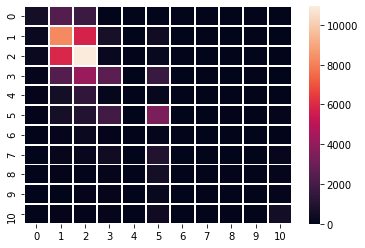

catboost Acc :  0.7695844538908649


In [14]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=150,
                           learning_rate=0.03,
                           depth=10,
                           l2_leaf_reg = 3,
                           loss_function='MultiClass',
                           eval_metric='MultiClass')

model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

### Test Actual dataset

In [15]:
print(cm)

[[5.9300e+02 2.3630e+03 1.7000e+03 2.1000e+01 0.0000e+00 1.2000e+01
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.9300e+02 8.2780e+03 5.8020e+03 7.0900e+02 0.0000e+00 4.7800e+02
  0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
 [2.6500e+02 5.8960e+03 1.0935e+04 2.2900e+02 0.0000e+00 2.4900e+02
  0.0000e+00 1.0000e+00 1.0000e+01 0.0000e+00 1.8000e+01]
 [1.2200e+02 2.3690e+03 4.2020e+03 2.5750e+03 0.0000e+00 1.6610e+03
  0.0000e+00 2.0000e+00 8.0000e+00 0.0000e+00 4.2000e+01]
 [5.7000e+01 5.7400e+02 1.3770e+03 1.5000e+02 0.0000e+00 1.7300e+02
  0.0000e+00 1.0000e+00 5.0000e+00 0.0000e+00 2.0000e+01]
 [6.1000e+01 6.4400e+02 9.9500e+02 1.8880e+03 0.0000e+00 3.3810e+03
  0.0000e+00 1.0000e+00 5.2000e+01 0.0000e+00 1.0600e+02]
 [1.1000e+01 9.6000e+01 2.6000e+02 5.0000e+01 0.0000e+00 1.1000e+02
  0.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00 2.1000e+01]
 [2.3000e+01 1.5900e+02 1.9900e+02 4.9100e+02 0.0000e+00 9.8000e+02
  0.0000e+00 1.0000e+00 1.2000e+01 0.0000e+00 1.66

In [16]:
import catboost
pred = model.predict(
                 eval_dataset, 
                 verbose=True)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.41433237030523806

In [18]:
df_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
case_id,,,,,,,,,,,,,,,,
318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [19]:
Convert_to_Num(df_test)
df_test = df_test.drop(columns=["City_Code_Patient", "patientid"])
df_test.head()

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
case_id,,,,,,,,,,,,,,
318439,21,2,3,2,3,2,3,0,2.0,0,2,2,7,3095.0
318440,29,0,4,0,2,2,3,5,2.0,1,2,4,7,4018.0
318441,26,1,2,1,3,2,1,3,4.0,0,2,3,7,4492.0
318442,6,0,6,0,3,2,1,5,2.0,1,2,3,7,4173.0
318443,28,1,11,0,2,2,2,5,2.0,1,2,4,7,4161.0


In [20]:
eval_dt = Pool(df_test)
eval_dt

In [21]:
preds_class = model.predict(eval_dt)
preds_class.shape

(137057, 1)

In [22]:
# Saving the model
import pickle
# Saving our classifier
with open('StayClassifier.pickle','wb') as f:
    pickle.dump(model,f)